In [ ]:
import functools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import interpolate, optimize
from scipy.misc import derivative

In [233]:
# Structural parameters for numerical solution of differential equations
N = 10000
end = 8 * np.pi
dt = end / N

time = np.linspace(0, end, num=N + 1, endpoint=True)
pos = np.linspace(0, end, num=N + 1, endpoint=True)
fd = np.linspace(0, end, num=N + 1, endpoint=True)
sd = np.linspace(0, end, num=N + 1, endpoint=True)

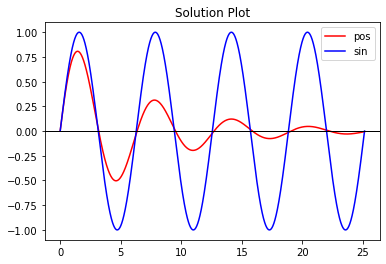

In [270]:
# Definition of intitial conditions and the differential equation

coeff = -0.3
pos[0] = 0
fd[0] = 1
sd[0] = -1 * pos[0] + coeff * fd[0]

for moment in range(0, N):
    pos[moment + 1] = pos[moment] + fd[moment] * dt
    fd[moment + 1] = fd[moment] + sd[moment] * dt
    sd[moment + 1] = -1 * pos[moment + 1] + coeff * fd[moment]

plt.plot(time, pos, "r", time, np.sin(time), "b")
plt.axhline(0, linewidth=1, color="black", linestyle="-")
plt.legend(["pos", "sin"])
plt.title(f"Solution Plot")
plt.show()

In [264]:
def solution(t):
    moment = int(t / dt)
    return pos[moment]


def goodfit(ff, realf, x, dx):
    acc = 0
    measure = map(lambda point: ((ff(point) - realf(point)) ** 2), x)
    for result in measure:
        acc = acc + result * dx
    return acc / end

In [265]:
print(goodfit(solution, np.cos, time, dt))
print(goodfit(solution, np.sin, time, dt))

0.5642019267457129
0.3053088351132348


In [ ]:
time.shape